In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [181]:
# Load data
lefse = pd.read_csv('TI_Colon_P11/lefse_de_output.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse


In [182]:
# Specify the columns to consider for finding the max
columns_to_check = ['colon', 'TI']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 


,Feature,Pvalues,FDR,colon,TI,LDAscore,abs_LDAscore,Response
1,Muribacter,0.000007,0.000193,264900.000,2146800.0,-5.97,5.97,TI
0,Pseudomonas,0.000002,0.000139,2189.900,241150.0,-5.08,5.08,TI
14,Lachnospiraceae_NK4A136_group,0.007116,0.021551,126340.000,10613.0,4.76,4.76,colon
5,Enterococcus,0.000176,0.001670,85407.000,8170.1,4.59,4.59,colon
6,Phyllobacterium,0.000209,0.001706,0.000,75047.0,-4.57,4.57,TI
4,Dysgonomonas,0.000160,0.001670,2948.000,74205.0,-4.55,4.55,TI
12,Acinetobacter,0.004153,0.016938,758.050,64350.0,-4.50,4.50,TI
20,Weissella,0.008882,0.024107,1600.300,61571.0,-4.48,4.48,TI
7,Corynebacterium_1,0.000596,0.004249,336.910,43967.0,-4.34,4.34,TI
8,Anaerotruncus,0.001386,0.008780,43041.000,0.0,4.33,4.33,colon


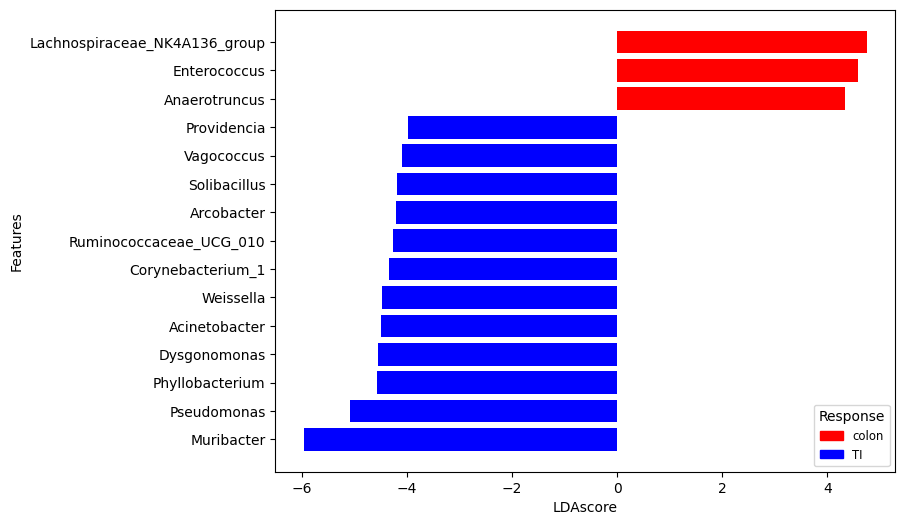

In [183]:
lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'colon': 'red','TI': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Feature'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='colon')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='TI')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')
# plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

plt.show()

In [155]:
# Load data
lefse = pd.read_csv('TI_Colon_P11/lefse_de_output_phyla.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted 

# Specify the columns to consider for finding the max
columns_to_check = ['colon', 'TI']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 


,Feature,Pvalues,FDR,colon,TI,LDAscore,Response
1,Tenericutes,0.003314,0.013653,0.000,12382,-3.79,TI
3,Fusobacteria,0.010528,0.023687,84.228,14487,-3.86,TI
0,Euglenozoa,0.000008,0.000070,0.000,24089,-4.08,TI
4,Epsilonbacteraeota,0.030711,0.055280,758.050,33944,-4.22,TI
2,Actinobacteria,0.004551,0.013653,758.050,55928,-4.44,TI
5,Proteobacteria,0.048815,0.073222,1948200.000,3156000,-5.78,TI


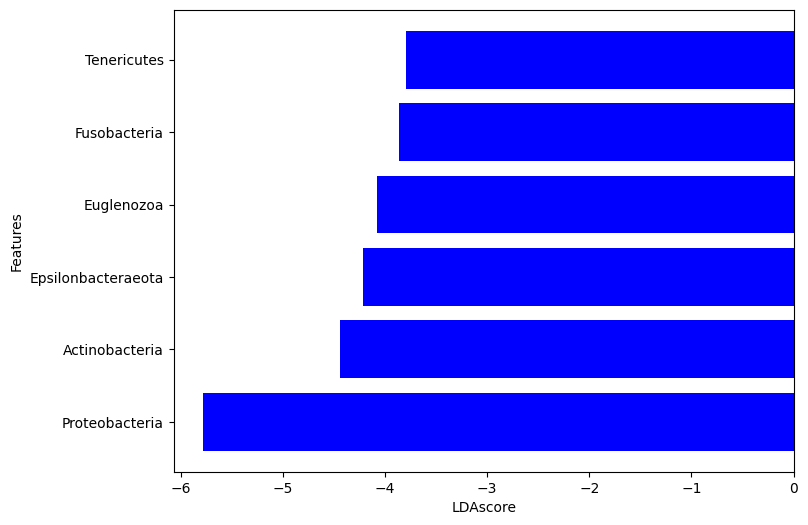

In [156]:
lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'colon': 'red','TI': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Feature'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='colon')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='TI')
# orange_patch = mpatches.Patch(color='purple', label='P28')
# plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')
# plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

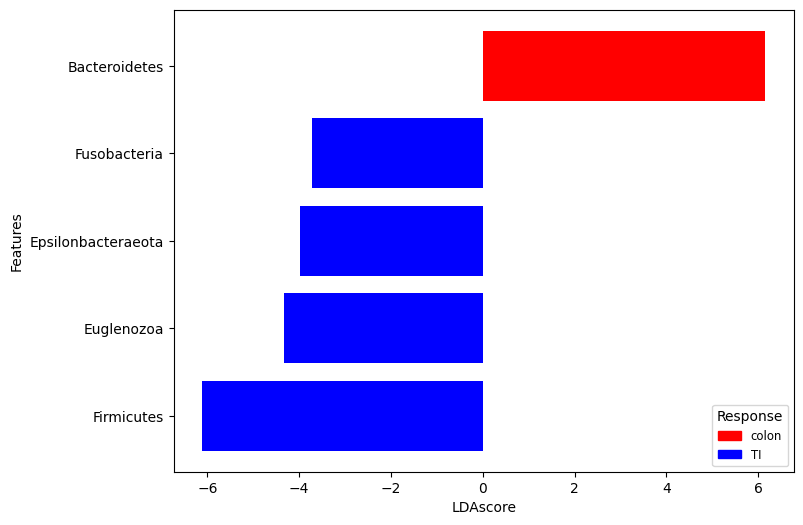

In [157]:
# Load data
lefse = pd.read_csv('TI_Colon_P14/lefse_de_output_phyla.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted 

# Specify the columns to consider for finding the max
columns_to_check = ['colon', 'TI']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'colon': 'red','TI': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Feature'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='colon')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='TI')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')
# plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

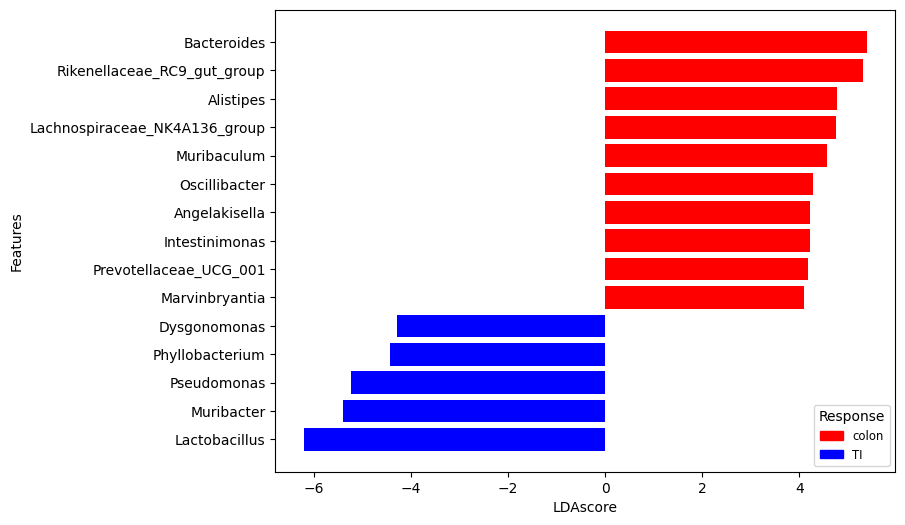

In [180]:
# Load data
lefse = pd.read_csv('TI_Colon_P14/lefse_de_output.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse

# Specify the columns to consider for finding the max
columns_to_check = ['colon', 'TI']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'colon': 'red','TI': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Feature'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='colon')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='TI')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')
# plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

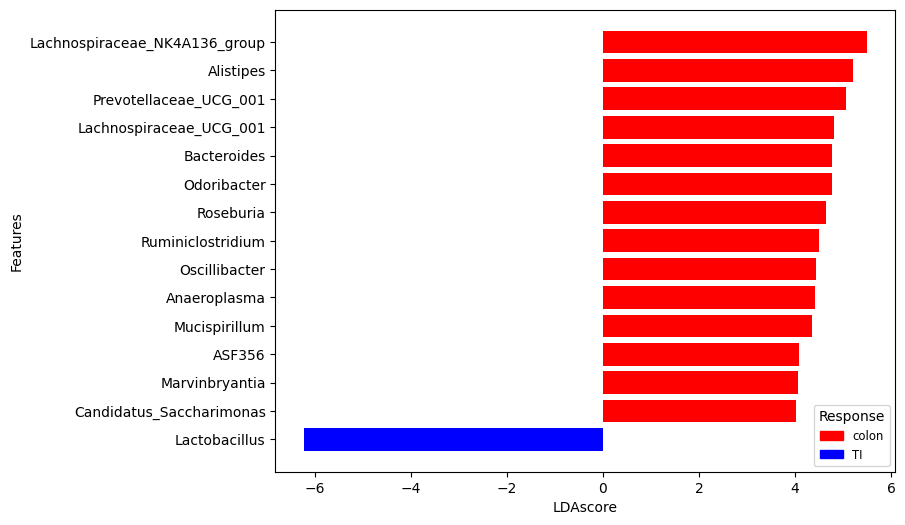

In [179]:
# Load data
lefse = pd.read_csv('TI_Colon_P28/lefse_de_output.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse

# Specify the columns to consider for finding the max
columns_to_check = ['colon', 'TI']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'colon': 'red','TI': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Feature'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='colon')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='TI')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')
# plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

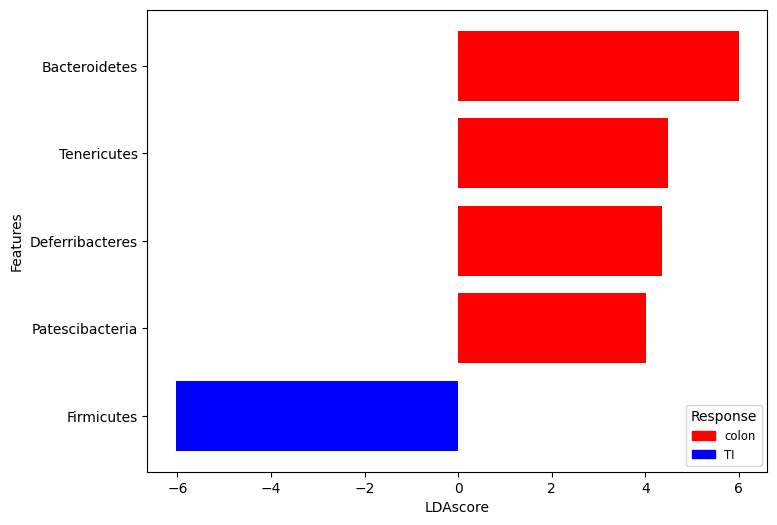

In [160]:
# Load data
lefse = pd.read_csv('TI_Colon_P28/lefse_de_output_phyla.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(10)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted 

# Specify the columns to consider for finding the max
columns_to_check = ['colon', 'TI']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'colon': 'red','TI': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Features'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='colon')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='TI')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')
# plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

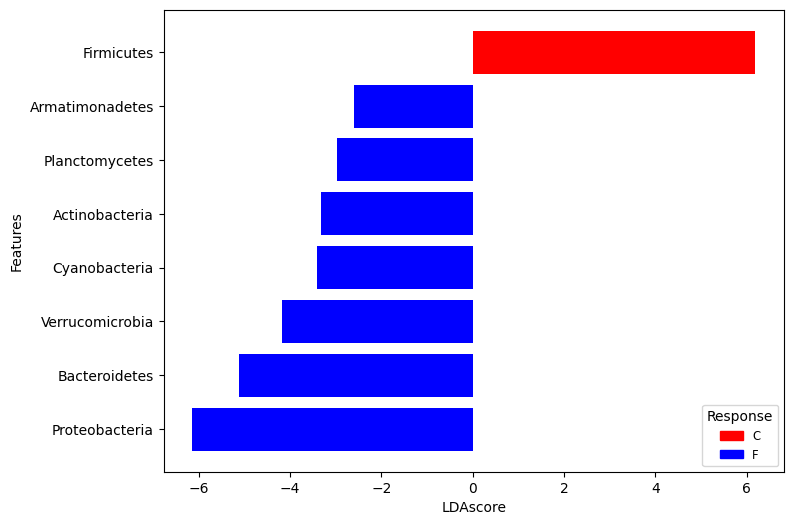

In [178]:
# Load data
lefse = pd.read_csv('P8_F_C/lefse_de_output_phyla.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse

# Specify the columns to consider for finding the max
columns_to_check = ['C', 'F']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'C': 'red','F': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Features'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='C')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='F')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')
# plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

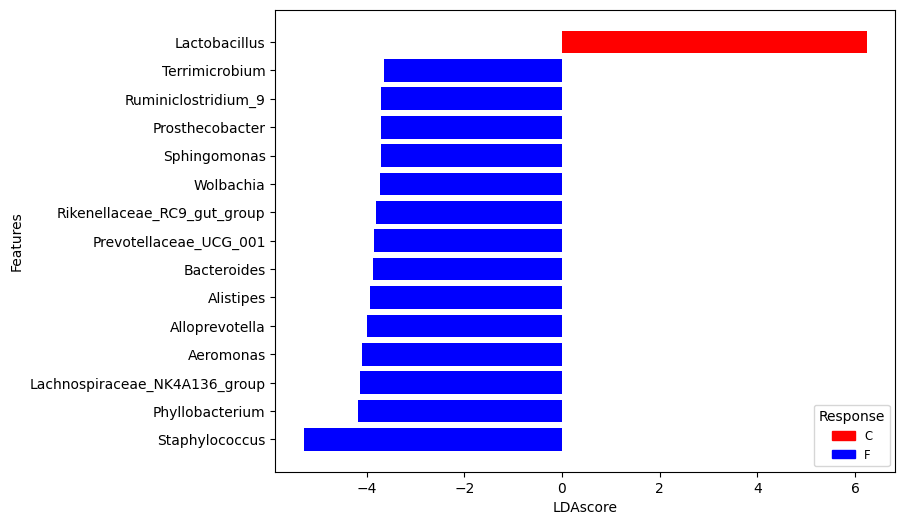

In [177]:
# Load data
lefse = pd.read_csv('P8_F_C/lefse_de_output.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
# lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(10)
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse

# Specify the columns to consider for finding the max
columns_to_check = ['C', 'F']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'C': 'red','F': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Features'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='C')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='F')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')
# plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

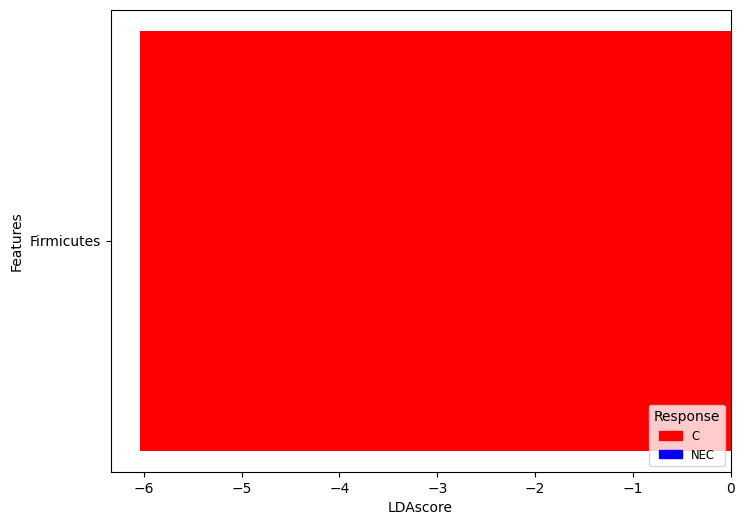

In [163]:
#Load data
lefse = pd.read_csv('P11_NEC_C/COLON/lefse_de_output_phyla.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(10)
# lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
# lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted 

# Specify the columns to consider for finding the max
columns_to_check = ['C', 'NEC']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'C': 'red','NEC': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Features'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='C')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='NEC')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')
# plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

In [171]:
# Load data
lefse = pd.read_csv('P11_NEC_C/COLON/lefse_de_output_genus.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse
lefse_sorted


,Features,Pvalues,FDR,NEC,C,LDAscore,abs_LDAscore
3,Lactobacillus,0.000099,0.000769,1746100.0,6492000.0,-6.38,6.38
8,Escherichia_Shigella,0.036059,0.120210,2591200.0,1200000.0,5.84,5.84
1,Enterococcus,0.000037,0.000449,1112600.0,84349.0,5.71,5.71
7,Lachnospiraceae_NK4A136_group,0.033821,0.120210,748060.0,126770.0,5.49,5.49
2,Staphylococcus,0.000043,0.000449,561410.0,33210.0,5.42,5.42
0,Streptococcus,0.000007,0.000219,22460.0,462360.0,-5.34,5.34
4,Muribacter,0.000186,0.001152,13087.0,268750.0,-5.11,5.11
9,Lachnoclostridium,0.039090,0.120210,255770.0,12159.0,5.09,5.09
6,Rikenellaceae_RC9_gut_group,0.026160,0.115850,1228.7,40639.0,-4.29,4.29
5,Roseburia,0.002408,0.012443,37319.0,1510.6,4.25,4.25


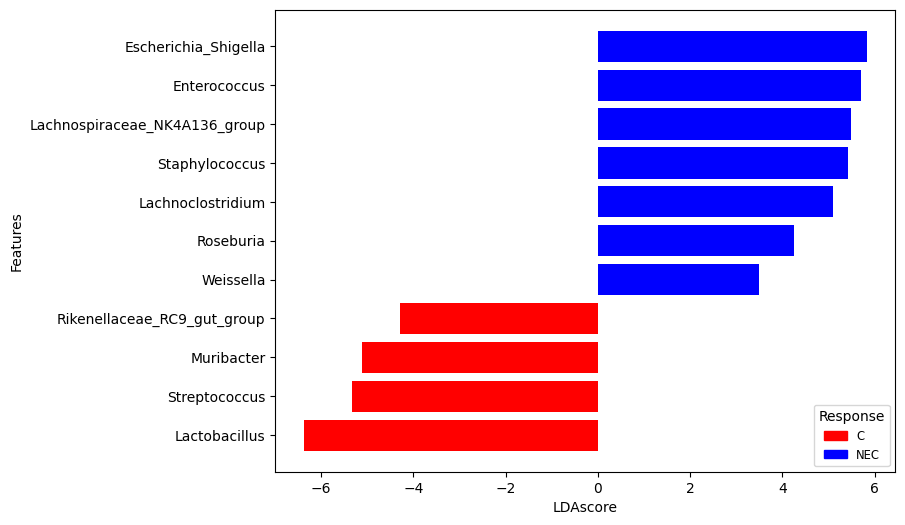

In [172]:
# Specify the columns to consider for finding the max
columns_to_check = ['C', 'NEC']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'C': 'red','NEC': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Features'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='C')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='NEC')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')
# plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

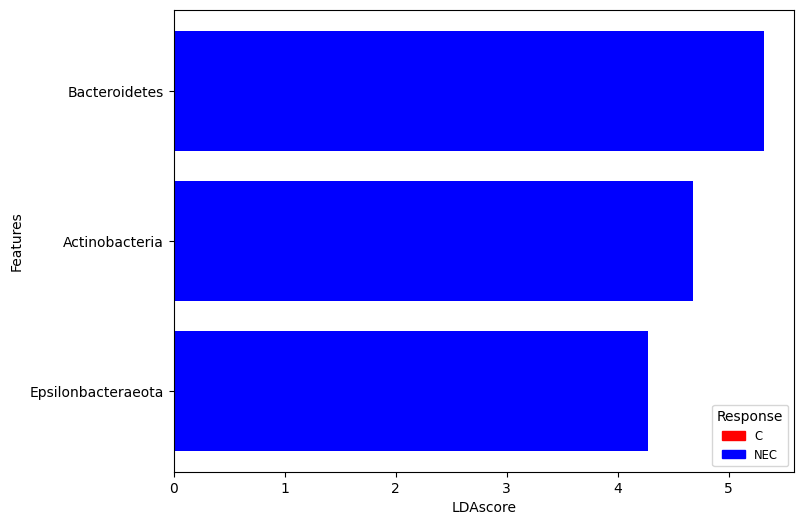

In [173]:
lefse = pd.read_csv('P11_NEC_C/TI/lefse_de_output_phyla.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
# lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(10)
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse

# Specify the columns to consider for finding the max
columns_to_check = ['C', 'NEC']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'C': 'red','NEC': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Features'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='C')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='NEC')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')

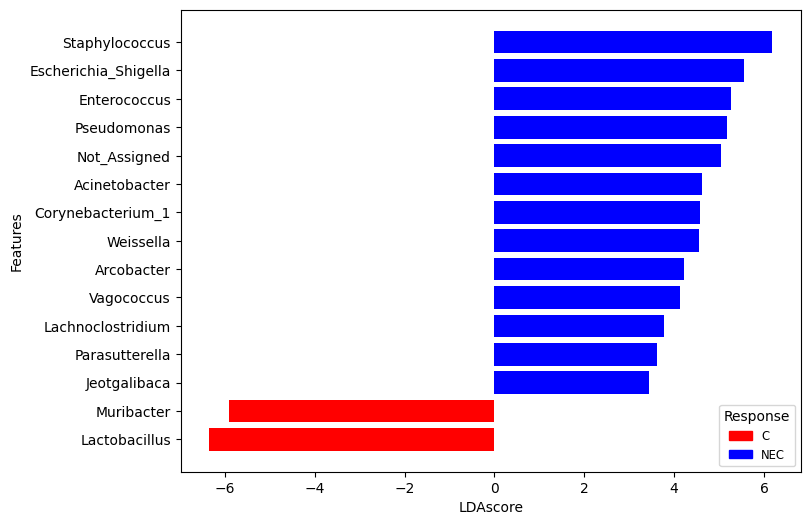

In [175]:
lefse = pd.read_csv('P11_NEC_C/TI/lefse_de_output.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
# lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(15)
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse

# Specify the columns to consider for finding the max
columns_to_check = ['C', 'NEC']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'C': 'red','NEC': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Features'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='C')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='NEC')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')

In [186]:
lefse = pd.read_csv('P8_GENOTYPE/lefse_de_output.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
# lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(15)
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse
lefse_sorted


,Features,Pvalues,FDR,Sig_Homo_HET,Sig_WT,LDAscore,abs_LDAscore
8,Wolbachia,0.031065,0.28244,29669.0,15266.00,3.86,3.86
6,Prosthecobacter,0.029049,0.28244,30210.0,16683.00,3.83,3.83
10,Proteus,0.040518,0.28244,18966.0,9113.10,3.69,3.69
5,Bdellovibrio,0.027016,0.28244,11634.0,4520.60,3.55,3.55
9,Ruminiclostridium,0.037918,0.28244,7179.9,2888.20,3.33,3.33
3,Anaerotruncus,0.023404,0.28244,5755.3,2188.60,3.25,3.25
7,Allorhizobium_Neorhizobium_Pararhizobium_Rhizo...,0.029759,0.28244,2117.9,0.00,3.03,3.03
4,Anaeroplasma,0.025628,0.28244,2545.2,627.87,2.98,2.98
1,Parabacteroides,0.020620,0.28244,1833.0,430.54,2.85,2.85
0,Stenotrophomonas,0.005474,0.28244,1244.1,179.39,2.73,2.73


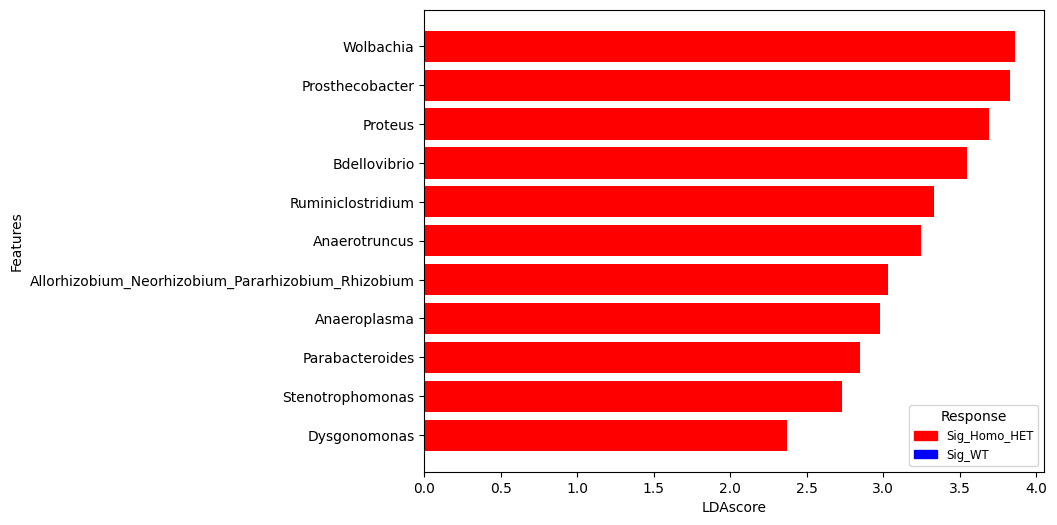

In [187]:
# Specify the columns to consider for finding the max
columns_to_check = ['Sig_Homo_HET', 'Sig_WT']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'Sig_Homo_HET': 'red','Sig_WT': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Features'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='Sig_Homo_HET')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='Sig_WT')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')

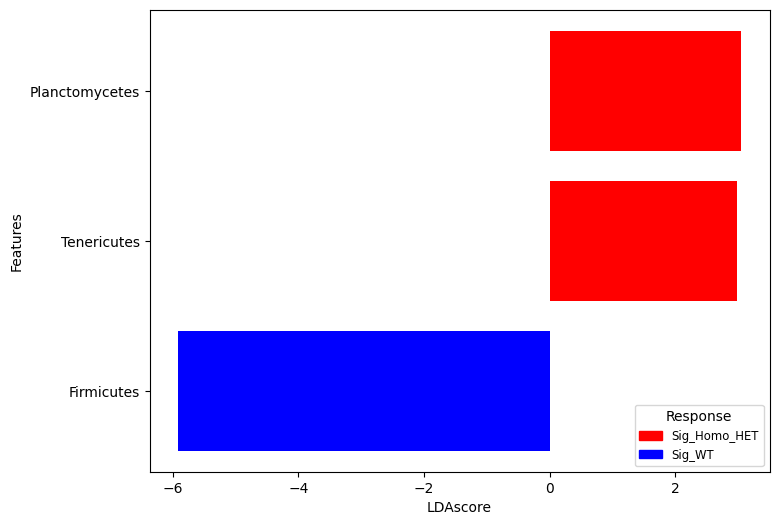

In [188]:
lefse = pd.read_csv('P8_GENOTYPE/lefse_de_output_phyla.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
# lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(15)
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse
lefse_sorted
# Specify the columns to consider for finding the max
columns_to_check = ['Sig_Homo_HET', 'Sig_WT']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'Sig_Homo_HET': 'red','Sig_WT': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Features'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='Sig_Homo_HET')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='Sig_WT')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')

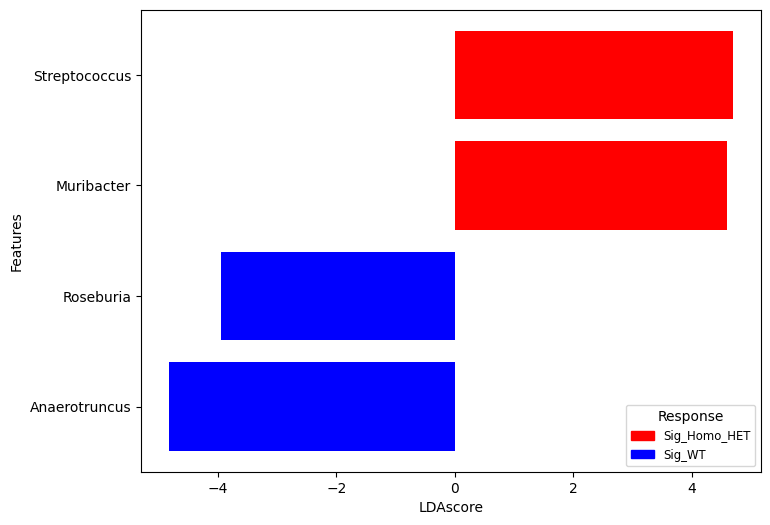

In [189]:
lefse = pd.read_csv('P11_GENOTYPE/COLON/lefse_de_output.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
# lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(15)
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse
lefse_sorted
# Specify the columns to consider for finding the max
columns_to_check = ['Sig_Homo_HET', 'Sig_WT']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'Sig_Homo_HET': 'red','Sig_WT': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Features'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='Sig_Homo_HET')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='Sig_WT')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')

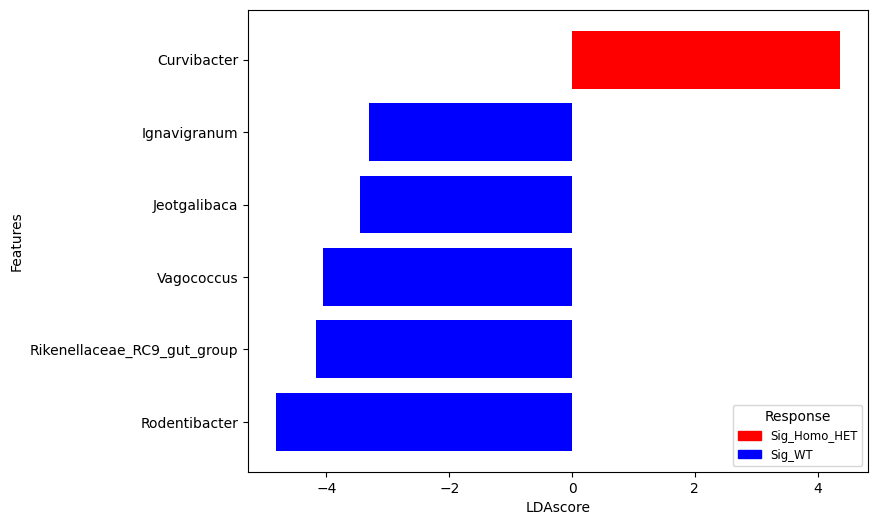

In [190]:
lefse = pd.read_csv('P11_GENOTYPE/TI/lefse_de_output.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
# lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(15)
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse
lefse_sorted
# Specify the columns to consider for finding the max
columns_to_check = ['Sig_Homo_HET', 'Sig_WT']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'Sig_Homo_HET': 'red','Sig_WT': 'blue'})
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Features'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='Sig_Homo_HET')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='Sig_WT')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')

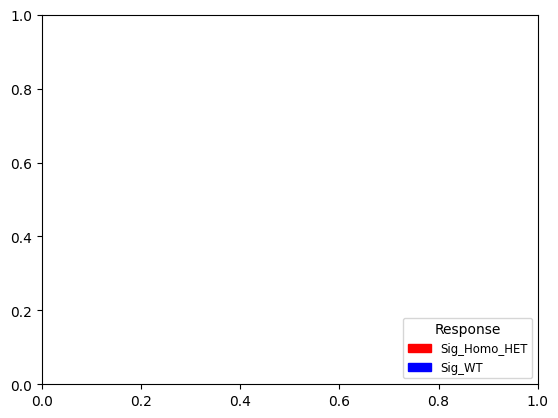

In [193]:
# lefse = pd.read_csv('P11_GENOTYPE/TI/lefse_de_output_phyla.csv',sep=',')
# condition = (lefse['Pvalues'] < 0.05)
# # Apply the condition to filter the data
# lefse = lefse[condition]
# # lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(15)
# lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
# lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# # Define the condition to filter the data (e.g., Category == 'X')
# lefse_sorted = lefse
# lefse_sorted
# # Specify the columns to consider for finding the max
# columns_to_check = ['Sig_Homo_HET', 'Sig_WT']
# # Find the column with the maximum value for each row
# lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
# lefse_sorted 

# lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
# colors = lefse_sorted ['Response'].map({'Sig_Homo_HET': 'red','Sig_WT': 'blue'})
# plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
# plt.barh(lefse_sorted ['Features'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# # max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# # Customize the plot
# # plt.title('Rotated Bar Figure Based on Two Columns')
# plt.xlabel('LDAscore')
# plt.ylabel('Features')

# # Create a legend for 'Category' colors
# red_patch = mpatches.Patch(color='red', label='Sig_Homo_HET')
# # blue_patch = mpatches.Patch(color='green', label='P11')
# green_patch = mpatches.Patch(color='blue', label='Sig_WT')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')